In [ ]:
import torch
from transformers import BertModel, BertConfig
import matplotlib.pyplot as plt


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


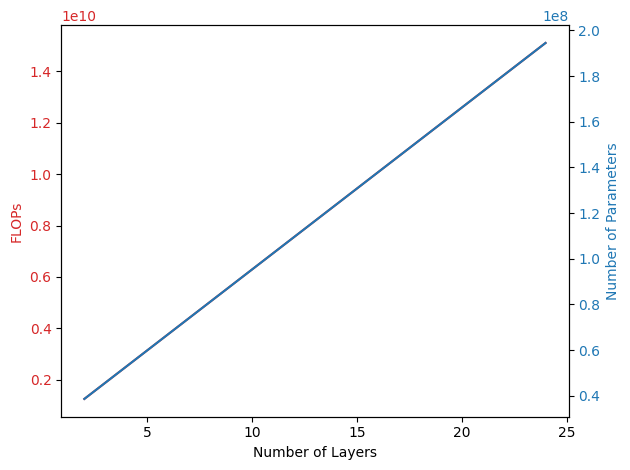

In [ ]:
def calculate_flops(config):
    # Key BERT config params
    hidden_size = config.hidden_size
    num_attention_heads = config.num_attention_heads
    intermediate_size = config.intermediate_size
    num_layers = config.num_hidden_layers
    seq_length = 128  # Fixed for this experiment

    # FLOPs per attention head
    attn_flops = 2 * hidden_size * (seq_length ** 2)
    # FLOPs per feedforward network
    ffn_flops = 2 * seq_length * intermediate_size * hidden_size
    # Total FLOPs for one transformer block
    block_flops = attn_flops + ffn_flops
    # Multiply by number of layers and attention heads
    total_flops = num_layers * block_flops
    return total_flops

def create_bert_config(num_hidden_layers=12, hidden_size=768, num_attention_heads=12, intermediate_size=3072):
    config = BertConfig(
        hidden_size=hidden_size,
        num_hidden_layers=num_hidden_layers,
        num_attention_heads=num_attention_heads,
        intermediate_size=intermediate_size,
    )
    return config

def vary_num_layers(base_config):
    num_layers = list(range(2, 25, 2))  # Vary from 2 to 24 layers
    flops = []
    params = []

    for layers in num_layers:
        config = create_bert_config(num_hidden_layers=layers, hidden_size=base_config.hidden_size,
                                    num_attention_heads=base_config.num_attention_heads,
                                    intermediate_size=base_config.intermediate_size)
        model = BertModel(config)
        flops.append(calculate_flops(config))
        params.append(count_parameters(model))

    return num_layers, flops, params

def plot_results(x, y1, y2, xlabel="Number of Layers"):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('FLOPs', color=color)
    ax1.plot(x, y1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Number of Parameters', color=color)
    ax2.plot(x, y2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.show()


base_config = create_bert_config()
num_layers, flops, params = vary_num_layers(base_config)
plot_results(num_layers, flops, params)


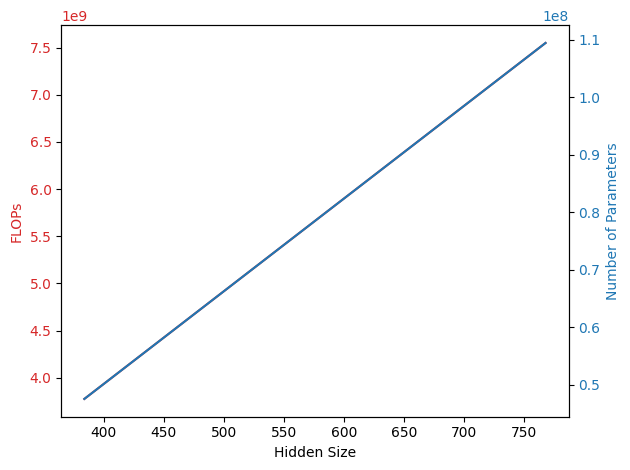

In [ ]:
def vary_hidden_size(base_config):
    hidden_sizes = list(range(384, 1025, 384))  # Vary from 128 to 1024
    flops = []
    params = []

    for hidden_size in hidden_sizes:
        config = create_bert_config(num_hidden_layers=base_config.num_hidden_layers, hidden_size=hidden_size,
                                    num_attention_heads=base_config.num_attention_heads,
                                    intermediate_size=base_config.intermediate_size)
        model = BertModel(config)
        flops.append(calculate_flops(config))
        params.append(count_parameters(model))

    return hidden_sizes, flops, params

base_config = create_bert_config()
hidden_sizes, flops, params = vary_hidden_size(base_config)
plot_results(hidden_sizes, flops, params, xlabel="Hidden Size")

In [ ]:
128 * 3

384

384.0